In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import pandas as pd

# number of frames in the file
Len = 600

# filename
File = 'AEQ31_edi_20181002_049_161934.h5'

# coordinates of region of interest
roi_coords = []

with h5py.File(f'C:/TDK/adatok/{File}', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
    
    frames = []
    
    for i in range(Len):
        
        image = np.array(roip1_data[100:230, 475:560, i])

        # scale the image
        image = cv2.normalize(image, dst=None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

        # uint16 to uint8 so we can use cv2 functions properly
        image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
        
        # using median filter
        blur = cv2.medianBlur(image, 3)
        
        # binarization
        thresh = cv2.threshold(blur, 170, 255, cv2.THRESH_BINARY)[1]
        
        # minMaxLoc to find max pixel value, if it's anything other than 0, we suspect hotspot
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(thresh)
        
        # adding index of frame to predifined list
        if max_val != 0:
            frames.append(i)

        
#with open(f'index_{File}.txt', 'w') as output:
    #output.write(str(frames))

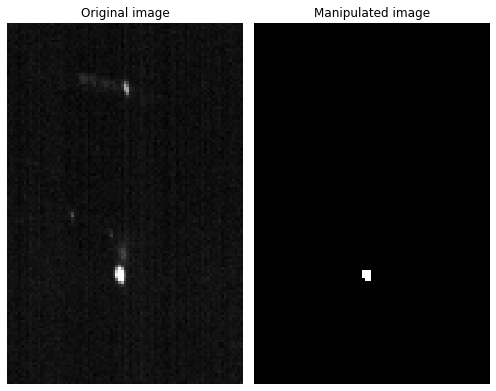

In [2]:
with h5py.File(f'C:/TDK/adatok/{File}', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
    
    frames = []
        
    image = np.array(roip1_data[100:230, 475:560, 400])

    # scale the image
    image = cv2.normalize(image, dst=None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

    # uint16 to uint8 so we can use cv2 functions properly
    image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
        
    # using median filter
    blur = cv2.medianBlur(image, 3)
        
    # binarization
    thresh = cv2.threshold(blur, 170, 255, cv2.THRESH_BINARY)[1]
        
    # minMaxLoc to find max pixel value, if it's anything other than 0, we suspect hotspot
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(thresh)
        
    
    plt.figure(figsize=(7,7))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title('Manipulated image')
    plt.axis('off')
    
    plt.tight_layout()
        